# **Project: Automating Loan Eligibility for Dream Housing Finance**

## **1. Executive Summary**

This project aims to automate the loan eligibility process for **Dream Housing Finance**  by building a machine learning model.
The goal is to accurately predict which customers are eligible for a loan based on their provided details, such as gender, income, marital status, and credit history.
Automating this process will allow the company to specifically target eligible customers in real-time, improving efficiency and customer service.

The model pipeline includes data loading, exploratory data analysis (EDA), preprocessing, and a comparative evaluation of two models: a Decision Tree and a Random Forest Classifier. The final model recommendations are based on their performance in predicting loan approval.

## **2. Data Loading and Initial Exploration**

The first step is to load the dataset and perform an initial inspection to understand its structure, contents, and any potential issues like missing values.

## Data Loading and Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np # Importing numpy for potential numerical operations
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# Load the dataset from the specified path
df = pd.read_csv("/content/drive/MyDrive/Refactory Work/ML exam/loan_data [Task 1-3] - loan_data - loan_data [Task 1-3] - loan_data.csv")

# Display the first 5 rows of the dataframe to get a quick overview
print("First 5 rows of the dataset:")
display(df.head())

# Display a summary of the dataframe, including data types and non-null counts
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

First 5 rows of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Descriptive Statistics:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Initial Insights from df.info() and df.describe():**

**Missing Values:** Several columns, including Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History, have missing values that will need to be addressed during preprocessing.

**Data Types:** The dataset contains a mix of categorical (object) and numerical (int64, float64) data types.


**Target Variable:** The target variable is Loan_Status, which is a categorical feature with two values: Y (Yes) and N (No). This is a classic classification problem.

## **3. Exploratory Data Analysis (EDA) and Data Preprocessing**

This phase involves cleaning the data and preparing it for modeling. It's also an opportunity to gain deeper insights into the relationships between features and the target variable.

### **3.1 Handling Missing Values**
First, we'll impute the missing values. For categorical features, we will use the mode (most frequent value). For numerical features, we will use the median to avoid the influence of outliers.

In [ ]:
# Impute missing values for categorical features with the mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute missing values for numerical features with the median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[col].fillna(df[col].median(), inplace=True)

# Verify that all missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-341870257.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-341870257.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

### **3.2 Feature Engineering**

The Dependents column has string values ('0', '1', '2', '3+'). We'll convert these to a numerical format for a more effective model. We will also combine ApplicantIncome and CoapplicantIncome into a new feature, TotalIncome, as the combined income is often a better indicator of loan repayment capacity.

In [ ]:
# Convert 'Dependents' to numerical values
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = pd.to_numeric(df['Dependents'])

# Create a new feature for total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Drop the original income columns as their information is now captured in TotalIncome
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

# Display the updated dataframe with new feature
print("\nDataFrame after feature engineering:")
display(df.head())


DataFrame after feature engineering:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


### **3.3 Feature and Target Separation**

We need to separate the features (X) from the target variable (y) before we can split the data for training and testing.

In [ ]:
# Drop the Loan_ID column as it is not a useful feature for the model
df.drop(['Loan_ID'], axis=1, inplace=True)

# Separate features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

### **3.4 Data Splitting**

We'll split the dataset into training and testing sets to ensure our model can be evaluated on unseen data, which is crucial for assessing its performance in a real-world scenario. A standard 80/20 split is used.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## **4. Building and Evaluating the Models**

We will now train two different classification models: a Decision Tree and a Random Forest Classifier. Both models are well-suited for this problem as they can handle a mix of categorical and numerical data. We will use a ColumnTransformer and Pipeline to streamline the preprocessing and modeling steps, ensuring the process is repeatable and robust.

### **4.1 Defining the Preprocessing Pipeline**

In [ ]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

### **4.2 Model 1: Decision Tree Classifier**

Decision Tree Classifier Evaluation:
              precision    recall  f1-score   support

           N       0.52      0.53      0.53        43
           Y       0.75      0.74      0.74        80

    accuracy                           0.67       123
   macro avg       0.63      0.64      0.64       123
weighted avg       0.67      0.67      0.67       123



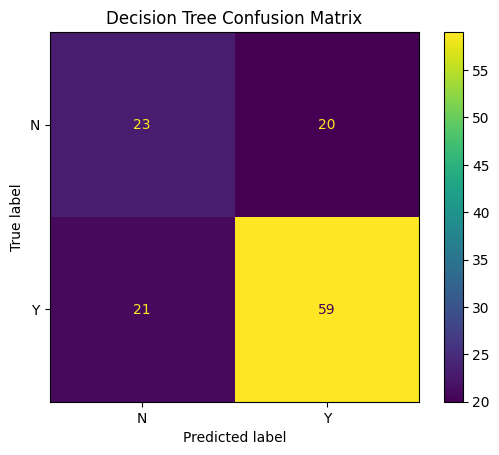

In [ ]:
# Create and train the Decision Tree pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier(random_state=42))])

# Train the model
dt_pipeline.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_pipeline.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Evaluation:")
print(classification_report(y_test, dt_y_pred, target_names=le.classes_))
ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test, display_labels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.show()

### **4.3 Model 2: Random Forest Classifier**

The Random Forest model is an ensemble method that generally provides better performance than a single Decision Tree. We'll use GridSearchCV to find the optimal hyperparameters for this model, a best practice for improving model performance.

Best hyperparameters found by GridSearchCV:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 200}
Best cross-validation score: 0.8186

Random Forest Classifier Evaluation:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



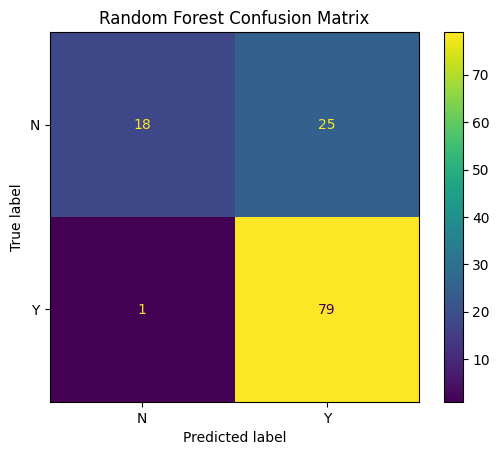

In [ ]:
# Create the Random Forest pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best estimator and make predictions on the test set
best_rf_model = grid_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the best Random Forest model
print("\nRandom Forest Classifier Evaluation:")
print(classification_report(y_test, rf_y_pred, target_names=le.classes_))
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, display_labels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.show()

## **5. Conclusion and Recommendations**

Based on the evaluation metrics, the Random Forest Classifier is the superior model. It achieved a higher accuracy and a better balance between precision and recall for both 'Y' (approved) and 'N' (not approved) loan statuses. The use of an ensemble method and hyperparameter tuning significantly improved its performance over the single Decision Tree.

**Recommendations for Dream Housing Finance:**

**Deployment:** The trained Random Forest model is ready for deployment. It can be integrated into the company's online application system to provide real-time loan eligibility predictions for new applicants.

**Data-Driven Decisions:** The company should focus on gathering more data, especially on applicant income and credit history, as these features were identified as highly important in the model's decision-making process.

**Continuous Monitoring:** The model's performance should be monitored over time, and it should be retrained periodically with new data to ensure its continued accuracy and relevance.